# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

# Naive Bayes

## 1)Apply Multinomial NB on these feature sets:SET1 and SET2

### 1.1 Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
# https://anaconda.org/conda-forge/mlxtend
from mlxtend.plotting import plot_decision_regions
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pandas
data = pandas.read_csv('preprocessed_data.csv') 

In [3]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [4]:
X = data.drop(['project_is_approved'], axis=1)
y = data['project_is_approved'].values
X.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


### 1.2 Splitting data into Train and cross validation(or test): Stratified Sampling

In [5]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [6]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

### 1.3 Make Data Model Ready: encoding eassay, and project_title

In [7]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

#### 1.3.1) Bag of Words

In [8]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['essay'].values)

X_tr_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print(X_tr_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

(49041, 41137) (49041,)
(24155, 41137) (24155,)
(36052, 41137) (36052,)


#### 1.3.2)TFIDF

In [9]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['essay'].values)

X_tr_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print(X_tr_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

(49041, 41137) (49041,)
(24155, 41137) (24155,)
(36052, 41137) (36052,)


### 1.4 Make Data Model Ready: encoding numerical, categorical features

In [10]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

#### 1.4.1)Categorical features

In [11]:
# school_state
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)

X_tr_state = vectorizer.transform(X_train['school_state'].values)
X_cv_state = vectorizer.transform(X_cv['school_state'].values)
X_test_state = vectorizer.transform(X_test['school_state'].values)

print(X_tr_state.shape, y_train.shape)
print(X_cv_state.shape, y_cv.shape)
print(X_test_state.shape, y_test.shape)

(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)


In [12]:
# project_grade_category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

X_tr_grade = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade = vectorizer.transform(X_test['project_grade_category'].values)

print(X_tr_grade.shape, y_train.shape)
print(X_cv_grade.shape, y_cv.shape)
print(X_test_grade.shape, y_test.shape)


(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)


In [13]:
# teacher_prefix
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
X_tr_teacher_prefix = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix = vectorizer.transform(X_test['teacher_prefix'].values)

print(X_tr_teacher_prefix.shape, y_train.shape)
print(X_cv_teacher_prefix.shape, y_cv.shape)
print(X_test_teacher_prefix.shape, y_test.shape)


(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)


#### 1.4.2)Text Features

In [14]:
# clean_categories

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in X_train['clean_categories']:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [15]:
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()))
vectorizer.fit(X_train['clean_categories'].values)

X_tr_clean_categories = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_categories = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories = vectorizer.transform(X_test['clean_categories'].values)

print(X_tr_clean_categories.shape, y_train.shape)
print(X_cv_clean_categories.shape, y_cv.shape)
print(X_test_clean_categories.shape, y_test.shape)                             

(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)


In [16]:
# clean_subcategories
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in X_train['clean_subcategories']:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [17]:
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()))
vectorizer.fit(X_train['clean_subcategories'].values)

X_tr_clean_subcategories = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories = vectorizer.transform(X_test['clean_subcategories'].values)

print(X_tr_clean_subcategories.shape, y_train.shape)
print(X_cv_clean_subcategories.shape, y_cv.shape)
print(X_test_clean_subcategories.shape, y_test.shape)                             

(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)


#### 1.4.3)Numerical Features

In [18]:
from sklearn.preprocessing import Normalizer

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_tr_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_tr_price_norm = X_tr_price_norm.reshape(-1,1)
X_cv_price_norm = X_cv_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_tr_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [19]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_tr_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_tr_teacher_number_of_previously_posted_projects_norm = X_tr_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
X_cv_teacher_number_of_previously_posted_projects_norm = X_cv_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm = X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)

print("After vectorizations")
print(X_tr_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [20]:
# SET 1
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr1 = hstack((X_tr_essay_bow, X_tr_state, X_tr_teacher_prefix, X_tr_grade,X_tr_clean_categories,X_tr_clean_subcategories,X_tr_price_norm,X_tr_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cv1 = hstack((X_cv_essay_bow, X_cv_state, X_cv_teacher_prefix, X_cv_grade,X_cv_clean_categories,X_cv_clean_subcategories,X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test1 = hstack((X_test_essay_bow, X_test_state, X_test_teacher_prefix, X_test_grade,X_test_clean_categories,X_test_clean_subcategories, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

In [21]:
# SET 2
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr2 = hstack((X_tr_essay_tfidf, X_tr_state, X_tr_teacher_prefix, X_tr_grade,X_tr_clean_categories,X_tr_clean_subcategories,X_tr_price_norm,X_tr_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cv2 = hstack((X_cv_essay_tfidf, X_cv_state, X_cv_teacher_prefix, X_cv_grade,X_cv_clean_categories,X_cv_clean_subcategories,X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test2 = hstack((X_test_essay_tfidf, X_test_state, X_test_teacher_prefix, X_test_grade,X_test_clean_categories,X_test_clean_subcategories, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

#### Applying Naive Bayes on SET 1

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

classifier = MultinomialNB()
classifier.fit(X_tr1,y_train)

# predicting on the cv data
cv_predict1 = classifier.predict(X_cv1)
cv_acc1 = accuracy_score(y_cv,cv_predict1)
print('accuracy_score on cross validation dataset : ',cv_acc1)

# predicting on the test data
test_predict1 = classifier.predict(X_test1)
test_acc1 = accuracy_score(y_test,test_predict1)
print('accuracy_score on test dataset : ',test_acc1)

accuracy_score on cross validation dataset :  0.7959428689712275
accuracy_score on test dataset :  0.7941029623876623


#### Applying Naive Bayes on SET 2

In [23]:
# https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# Applying Naive Bayes on SET 2
classifier = MultinomialNB()
classifier.fit(X_tr2,y_train)

# predicting on the cv data
cv_predict2 = classifier.predict(X_cv2)
cv_acc2 = accuracy_score(y_cv,cv_predict2)
print('accuracy_score on cross validation dataset : ',cv_acc2)

# predicting on the test data
test_predict2 = classifier.predict(X_test1)
test_acc2 = accuracy_score(y_test,test_predict2)
print('accuracy_score on test dataset : ',test_acc2)

accuracy_score on cross validation dataset :  0.8485199751604223
accuracy_score on test dataset :  0.8485243537113059


## 2)The hyper paramter tuning(find best alpha:smoothing parameter)

In [24]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.1)Finding best alpha for SET 1

In [25]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

train_auc = []
cv_auc = []
alp = [0.0001,0.001,0.01,0.1,1,10]
for i in tqdm(alp):
    classifier = MultinomialNB(alpha=i)
    classifier.fit(X_tr1,y_train)

    y_train_pred = classifier.predict_proba(X_tr1)[:,1] # only for positive class    
    y_cv_pred = classifier.predict_proba(X_cv1)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.69it/s]


In [26]:
# using log values of different values of alpha in list alp as to plot graphs to see the better results 
import math
l = []
for i in alp:
    l.append(math.log(i,10))

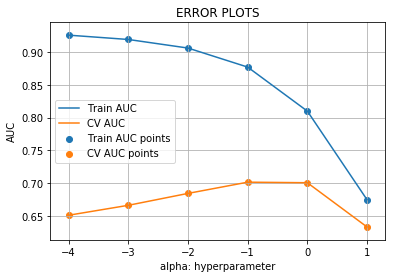

In [27]:
plt.plot(l, train_auc, label='Train AUC')
plt.plot(l, cv_auc, label='CV AUC')

plt.scatter(l, train_auc, label='Train AUC points')
plt.scatter(l, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### best alpha for SET 1 = 1

### 2.2)Finding best alpha for SET 2

In [28]:
train_auc = []
cv_auc = []
alp = [0.0001,0.001,0.01,0.1,1,10]
for i in tqdm(alp):
    classifier = MultinomialNB(alpha=i)
    classifier.fit(X_tr2,y_train)

    y_train_pred = classifier.predict_proba(X_tr2)[:,1]    
    y_cv_pred = classifier.predict_proba(X_cv2)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.67it/s]


In [29]:
# using log values of different values of alpha in list alp as to plot graphs to see the better results 
l = []
for i in alp:
    l.append(math.log(i,10))

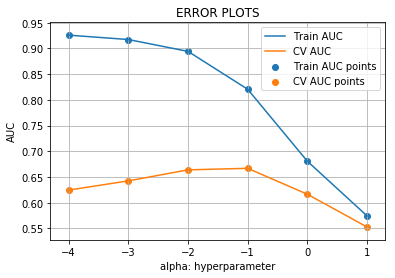

In [30]:
plt.plot(l, train_auc, label='Train AUC')
plt.plot(l, cv_auc, label='CV AUC')

plt.scatter(l, train_auc, label='Train AUC points')
plt.scatter(l, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### best alpha for SET 2 = 0.1

### 2.3)Testing the performance of the model on test data, plotting ROC Curves for SET 1

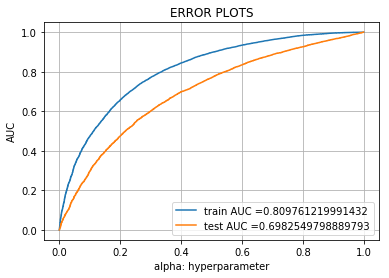

In [31]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_alpha = 1 # best alpha for SET 1 = 1 
# For SET 1
classifier = MultinomialNB(best_alpha)
classifier.fit(X_tr1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = classifier.predict_proba(X_tr1)[:,1]    
y_test_pred = classifier.predict_proba(X_test1)[:,1]

auc_score_set1 = roc_auc_score(y_test,y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### 2.4)Testing the performance of the model on test data, plotting ROC Curves for SET 2

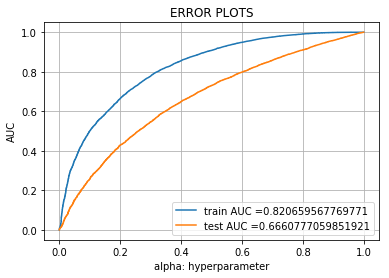

In [32]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_alpha = 0.1 #best alpha for SET 1 = 1
# For SET 2
classifier = MultinomialNB(best_alpha)
classifier.fit(X_tr2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = classifier.predict_proba(X_tr2)[:,1]    
y_test_pred = classifier.predict_proba(X_test2)[:,1]

auc_score_set2 = roc_auc_score(y_test,y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## 3)Finding top 20 features from SET 1 using absolute values of `feature_log_prob_`

In [51]:
classifier = MultinomialNB(alpha=1)
classifier.fit(X_tr1,y_train)
l = classifier.feature_log_prob_

In [39]:
l = list(l)
list2 = []
for i in l:
    l2 = []
    l2.extend(sorted(range(len(i)), key=lambda j: i[j],reverse = True)[:20])
    print(l2)
    list2.append(l2)
print(list2)  # list containing index top 20 values for both classes

[35206, 32080, 21184, 24358, 7253, 25089, 21168, 36803, 17213, 36682, 24444, 22503, 39892, 24622, 40596, 7727, 21941, 29727, 1127, 9696]
[35206, 32080, 24358, 21184, 7253, 36682, 25089, 36803, 21168, 17213, 22503, 24444, 39892, 40596, 24622, 29727, 38934, 21941, 9696, 1127]
[[35206, 32080, 21184, 24358, 7253, 25089, 21168, 36803, 17213, 36682, 24444, 22503, 39892, 24622, 40596, 7727, 21941, 29727, 1127, 9696], [35206, 32080, 24358, 21184, 7253, 36682, 25089, 36803, 21168, 17213, 22503, 24444, 39892, 40596, 24622, 29727, 38934, 21941, 9696, 1127]]


In [40]:
# since X_tr1 = hstack((X_tr_essay_bow, X_tr_state, X_tr_teacher_prefix, X_tr_grade,X_tr_clean_categories,X_tr_clean_subcategories,X_tr_price_norm,X_tr_teacher_number_of_previously_posted_projects_norm)).tocsr()
# making list of features we have in according to X_tr1
s = ['essay','school_state','teacher_prefix','project_grade_category','clean_categories','clean_subcategories']

In [41]:
list1 = []
for i in s:
    vec = CountVectorizer()
    vec.fit(X[i].values)
    list1.extend(vec.get_feature_names()) # list containing feature names according to we have in X_tr1

In [42]:
list1.extend(X['price'].values)
list1.extend(X['teacher_number_of_previously_posted_projects'].values)

In [43]:
l1 = []
l2 = []
for k,i in enumerate(list2):
    for index,r in enumerate(list1):
        for j in range(len(i)):
            if index ==  i[j]:
                if k == 0:
                    l1.append(r) # For class 0
                elif k == 1:
                    l2.append(r) # For class 1    
# getting feature names from both the classes 0 and 1

In [44]:
print("Top 20 features from class 0:")
print(l1)
print("Top 20 features from class 1:")
print(l2)

Top 20 features from class 0:
['578', 'brainstem', 'buffalo', 'chosen', 'endeavours', 'garde', 'garish', 'gooders', 'groupwork', 'hs', 'humanoid', 'hygrometer', 'impelled', 'litters', 'microworlds', 'olympics', 'pathmy', 'pbskids', 'pubic', 'rangeland']
Top 20 features from class 1:
['578', 'brainstem', 'chosen', 'endeavours', 'garde', 'garish', 'gooders', 'groupwork', 'hs', 'humanoid', 'hygrometer', 'impelled', 'litters', 'microworlds', 'olympics', 'pathmy', 'pbskids', 'preferably', 'pubic', 'rangeland']


## 4)Summary

as mentioned in the step 5 of instructions

In [47]:
# how to use pretty table : https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists
from prettytable import PrettyTable
x = PrettyTable(["Vectorizer","Model","Hyper Parameter","AUC"])
x.add_row(['BOW','MultinomialNB',1,auc_score_set1])
x.add_row(['TFIDF','MultinomialNB',0.1,auc_score_set2])
print(x)

+------------+---------------+-----------------+--------------------+
| Vectorizer |     Model     | Hyper Parameter |        AUC         |
+------------+---------------+-----------------+--------------------+
|    BOW     | MultinomialNB |        1        | 0.6982549798889793 |
|   TFIDF    | MultinomialNB |       0.1       | 0.6660777059851921 |
+------------+---------------+-----------------+--------------------+
